In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob
plt.rcParams["figure.figsize"] = (13,8)

In [2]:
bias=glob('./Biases/*.fits')
print(bias[0])

./Biases/ucdA_0021.fits


In [3]:
data=fits.open(bias[0])
data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2054 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2024-03-13T19:02:20' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
OBSERVAT= 'CAHA    '           / Observatory name                               
OBSCODE = '493     '        

1002.0


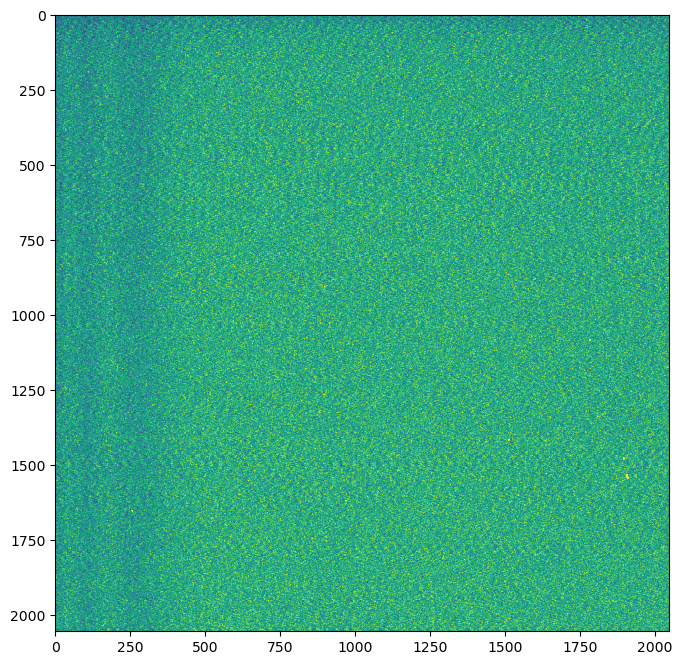

In [4]:
im_data=fits.open(bias[1])[0].data
plt.imshow(im_data,vmin=998,vmax=1004)
print(np.median(im_data))

In [5]:
bias_arr=[]
for num,b in enumerate(bias):
    bias_arr.append(fits.open(b)[0].data)
print(np.shape(bias_arr))


(21, 2054, 2048)


(2054, 2048)
1001.0
1007.0
997.0


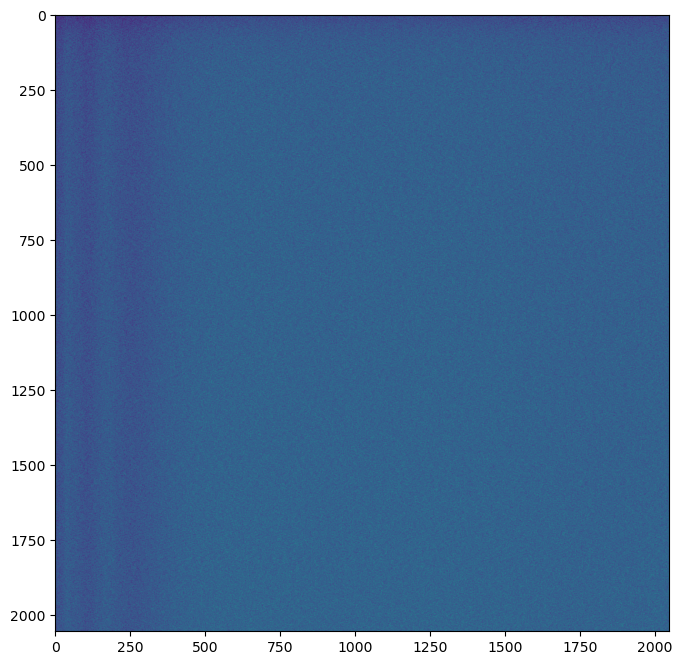

In [6]:
master_bias=np.median(bias_arr,axis=0)
print(np.shape(master_bias))
plt.imshow(master_bias,vmin=999,vmax=1007)
print(np.median(master_bias))
print(np.max(master_bias))
print(np.min(master_bias))


In [7]:
hdu=fits.PrimaryHDU(master_bias)
hdu.writeto('./master_bias.fits',overwrite='True')

In [8]:
print(type(master_bias[0][0]))

<class 'numpy.float64'>


1003.0


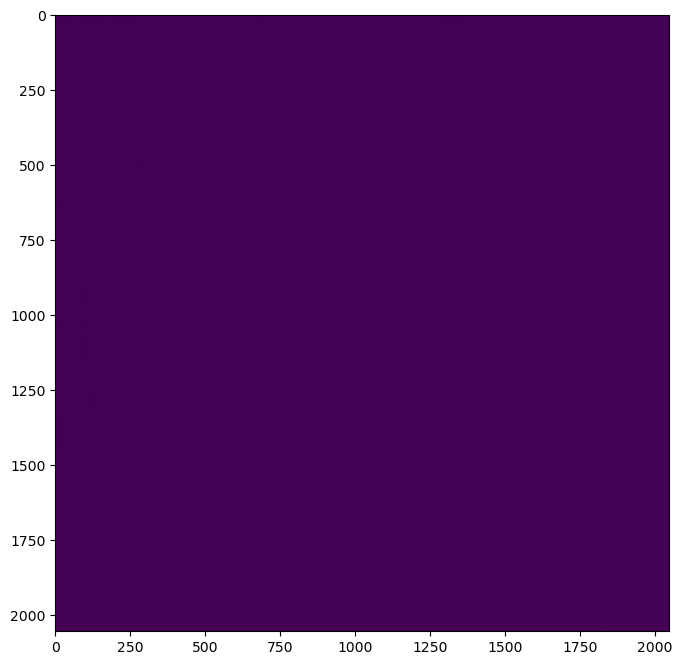

In [9]:
darklist=glob('./Darks/*.fits')
im_data=fits.open(darklist[0])[0].data
plt.imshow(im_data)
print(np.median(im_data))

In [10]:
data=fits.open(darklist[-1])
data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2054 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2024-03-10T22:14:03' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
OBSERVAT= 'CAHA    '           / Observatory name                               
OBSCODE = '493     '        

In [11]:
dark_ims=[]
for dark in darklist:
    dark_ims.append(fits.open(dark)[0].data)
print(np.shape(dark_ims))

(21, 2054, 2048)


In [12]:
red_darks=[]
for dark in dark_ims:
    red_darks.append(np.add(np.asarray(dark),-np.asarray(master_bias)))
print(np.shape(red_darks))

(21, 2054, 2048)


In [13]:
master_dark=np.median(red_darks,axis=0)
print(np.shape(master_dark))

(2054, 2048)


In [14]:
hdu=fits.PrimaryHDU(master_dark)
hdu.writeto('./master_dark.fits',overwrite='True')

2.0
2972.0
1.745088898566821
-7.0


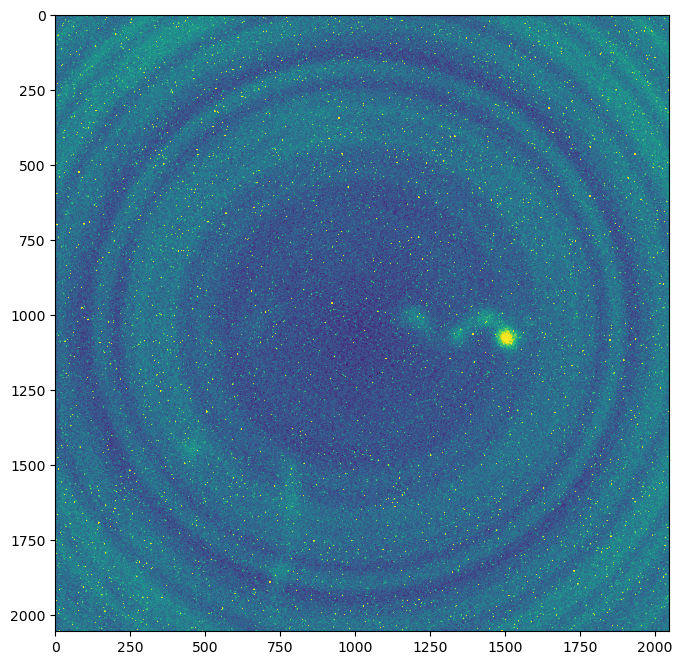

In [15]:
plt.imshow(master_dark,vmin=0,vmax=5)
print(np.median(master_dark))
print(np.max(master_dark))
print(np.mean(master_dark))
print(np.min(master_dark))

In [16]:
flat_list=glob('./Flats/*.fits')
data=fits.open(flat_list[0])
data[0].header['EXPTIME']

0.1

In [17]:
flats_B=[]
flats_V=[]
flats_R=[]
for flat in flat_list:
    filt=fits.open(flat)[0].header['Filter']
    if filt=='B':
        data=fits.open(flat)[0].data
        data=np.add(np.asarray(data),-np.asarray(master_bias))
        #data=np.add(np.asarray(data),-np.asarray(master_dark))
        flats_B.append(data)
    elif filt=='V':
        data=fits.open(flat)[0].data
        data=np.add(np.asarray(data),-np.asarray(master_bias))
        #data=np.add(np.asarray(data),-np.asarray(master_dark))
        flats_V.append(data)
    elif filt=='R':
        data=fits.open(flat)[0].data
        data=np.add(np.asarray(data),-np.asarray(master_bias))
        #data=np.add(np.asarray(data),-np.asarray(master_dark))
        flats_R.append(data)
print(np.shape(flats_B))
print(np.shape(flats_V))
print(np.shape(flats_R))

(5, 2054, 2048)
(5, 2054, 2048)
(5, 2054, 2048)


In [18]:
master_B_flat=np.median(flats_B,axis=0)
master_B_flat=master_B_flat/np.median(master_B_flat)
master_V_flat=np.median(flats_V,axis=0)
master_V_flat=master_V_flat/np.median(master_V_flat)
master_R_flat=np.median(flats_R,axis=0)
master_R_flat=master_R_flat/np.median(master_R_flat)

1.1849721806120266
0.7140755403381126
1.0
0.9992325481250858


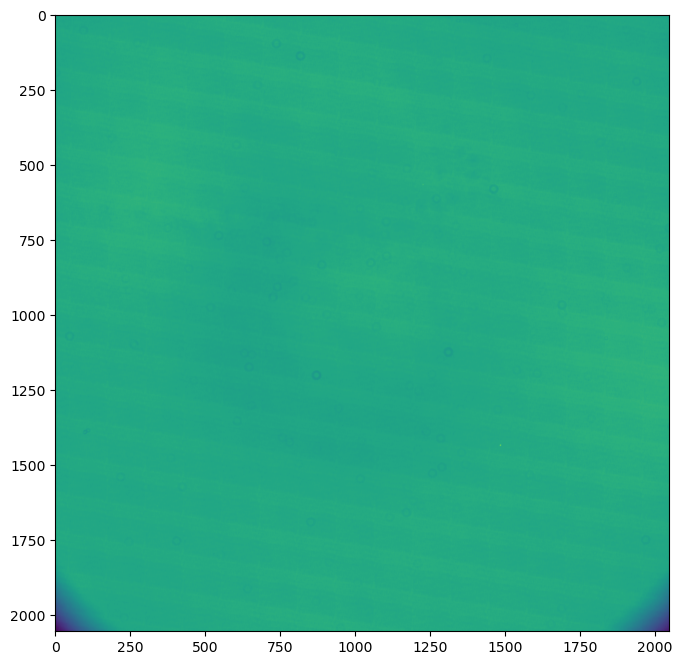

In [19]:
plt.imshow(master_R_flat)
print(np.max(master_R_flat))
print(np.min(master_R_flat))
print(np.median(master_R_flat))
print(np.mean(master_R_flat))

In [20]:
hdu=fits.PrimaryHDU(master_B_flat)
hdu.writeto('./master_flat_B.fits',overwrite='True')
hdu=fits.PrimaryHDU(master_V_flat)
hdu.writeto('./master_flat_V.fits',overwrite='True')
hdu=fits.PrimaryHDU(master_R_flat)
hdu.writeto('./master_flat_R.fits',overwrite='True')

In [21]:
#Access all the images:
#Check filter
#Subtract master bias
#master dark
#divide by master flat
#save as image in processed section in correct sub folder with original
test=glob('./Raw/*/*.fits')
print(test[0].lstrip('./Raw/'))

MCG05/ucdA_0418.fits


In [22]:
for image in test:
    data=fits.open(image)[0].data
    hdr=fits.open(image)[0].header
    if hdr['FILTER']=='B':
        data=np.add(np.asarray(data),-np.asarray(master_bias))
        data=np.add(np.asarray(data),-np.asarray(master_dark))
        data=np.divide(data,master_B_flat)
    elif hdr['FILTER']=='V':
        data=np.add(np.asarray(data),-np.asarray(master_bias))
        data=np.add(np.asarray(data),-np.asarray(master_dark))
        data=np.divide(data,master_V_flat)
    elif hdr['FILTER']=='R':
        data=np.add(np.asarray(data),-np.asarray(master_bias))
        data=np.add(np.asarray(data),-np.asarray(master_dark))
        data=np.divide(data,master_R_flat)
    hdu=fits.PrimaryHDU(data=data,header=hdr)
    hdu.writeto('./Processed/'+image.lstrip('./Raw/'),overwrite='True')

: 